In [6]:
import numpy as np
import pandas as pd 
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [15]:
np.random.seed(55)
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("data/protein_only.csv") 
# Preview the first 5 lines of the loaded data 
#data.head()

In [16]:
feature_names=list(data)

#print(feature_names)

datamat=np.array(data)
random.shuffle(datamat)

labels=datamat[:,-1]
datamat=datamat[:,:-1]
datamat = np.nan_to_num(datamat)

In [21]:
def normalize_data(datamat):
    for i in range(0, datamat.shape[1]):
        if np.max(datamat[:,i]) != 0:
            datamat[:,i]=(datamat[:,i]-np.mean(datamat[:,i]))/np.std(datamat[:,i])
    return datamat

#Split Data into Training, Validation, and Testing Sets

train_perc=0.7
test_perc=0.15
val_perc=0.15

ind1=int(datamat.shape[0]*train_perc)
ind2=ind1+int(datamat.shape[0]*val_perc)

X_train=normalize_data(datamat[:ind1,:])
y_train=labels[:ind1]

X_val=normalize_data(datamat[ind1:ind2,:])
y_val=labels[ind1:ind2]

X_test=normalize_data(datamat[ind2:,:])
y_test=labels[ind2:]

Minimum validation error of 0.2716049382716049 achieved for k=2 nearest neighbors


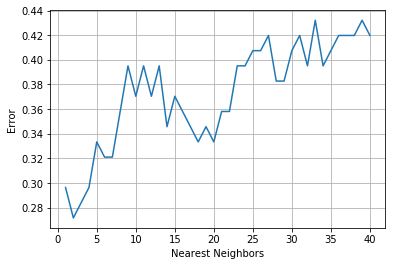

Testing error: 0.2891566265060241
Test accuracy: 0.7108433734939759


In [22]:
# Something is going wrong here... 
k = np.linspace(1,40,40)
error = np.zeros((k.size,1))
n = y_val.shape[0]
for j in range(k.size):
    knn_class = np.zeros((n,1))
    neigh = KNeighborsClassifier(n_neighbors=int(k[j]))
    neigh.fit(X_train, y_train) 
    pred = neigh.predict(X_val)
    error[j] = np.sum(np.abs(pred - y_val))/n

print('Minimum validation error of {} achieved for k={} nearest neighbors'.format(np.min(error),
                                                                                  np.argmin(error)+1))
fig, ax = plt.subplots()
ax.plot(k, error)

ax.set(xlabel='Nearest Neighbors', ylabel='Error')
ax.grid()
plt.show()


n,p = X_test.shape
k = np.argmin(error)+1
neigh = KNeighborsClassifier(n_neighbors=int(k))
neigh.fit(X_train, y_train) 
pred = neigh.predict(X_test)
err = np.sum(np.abs(pred - y_test))/n
print('Testing error: {}'.format(err))
print('Test accuracy: {}'.format(1-err))

In [23]:
1-0.2716049382716049


0.7283950617283951